# CHAPTER 14 PCA와 LDA

## 11.4 데이터를 사용한 실습

### 11.4.1 필요한 패키지 import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 11.4.2 원본 데이터 확인

In [2]:
data = datasets.load_breast_cancer()
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
x = data.data[:, :2] 
y = data.target
target_names = data.target_names
target_names

array(['malignant', 'benign'], dtype='<U9')

- malignant : 악성의 
- benign : 양성의

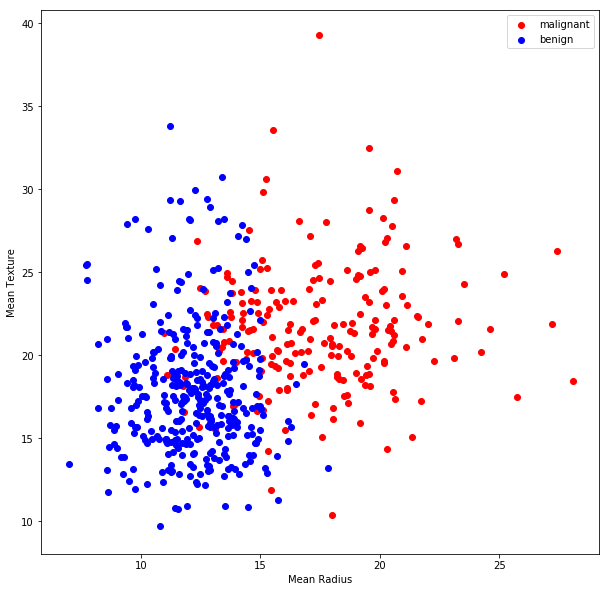

In [4]:
plt.figure(figsize=(10, 10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1], color=color, label=target_name)

plt.legend()
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.show()

### 11.4.3 PCA

In [5]:
x = data.data
y = data.target
target_names = data.target_names

In [6]:
pca = PCA(n_components=2)
x_p = pca.fit(x).transform(x)
print('가장 큰 주성분 두 개에 대한 분산: %s' % str(pca.explained_variance_ratio_))

가장 큰 주성분 두 개에 대한 분산: [0.98204467 0.01617649]


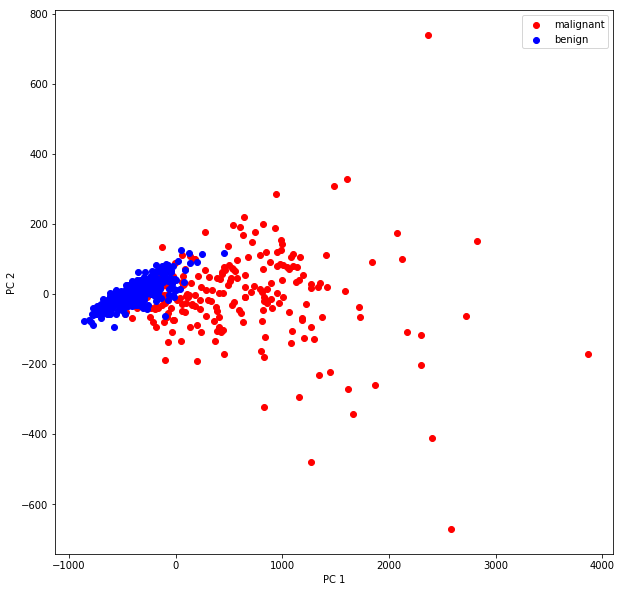

In [7]:
plt.figure(figsize=(10, 10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_p[y == i, 0], x_p[y == i, 1], color=color, label=target_name)

plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### 11.4.4 LDA

In [8]:
x = data.data
y = data.target
target_names = data.target_names

In [9]:
lda = LinearDiscriminantAnalysis(solver='eigen', n_components=1)
x_l = lda.fit(x, y).transform(x)

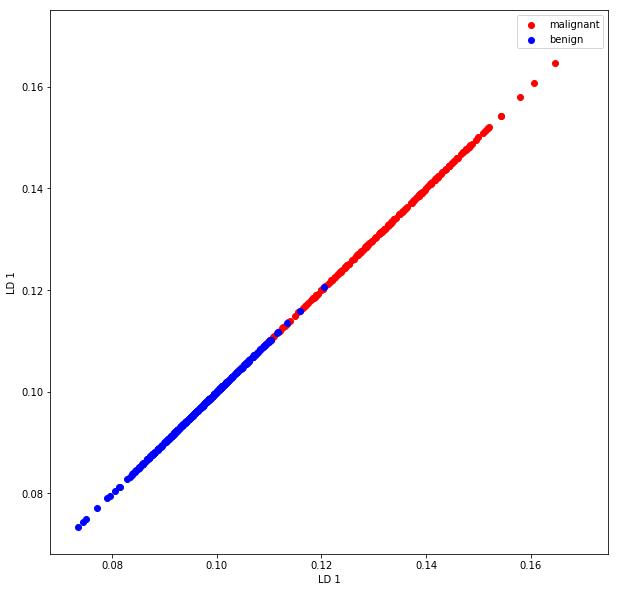

In [10]:
plt.figure(figsize=(10, 10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_l[y == i, 0], x_l[y == i, 0], color=color, label=target_name) # 수정 후

plt.legend()
plt.xlabel('LD 1')
plt.ylabel('LD 1') # 1개 component 이므로 LD1으로 동일
plt.show()